In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout, Embedding,GRU

from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_csv("fake_train.csv")

In [3]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


# Insights
Total columns=5

Total rows=20800

No need to change data type of columns.

Null values are present in title,author and text columns.




# EDA

In [5]:
df.shape

(20800, 5)

In [6]:
df=df.dropna()  #drop null values

In [7]:
df.shape     #check null values are drop or not using df.shape

(18285, 5)

In [8]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [9]:
#In df some rows missing/delete.

In [10]:
messages=df.copy()    #copy df into messages

In [11]:
messages.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [12]:
messages.reset_index(inplace=True)      

In [13]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [14]:
#Get independent features
x=messages["title"]

In [15]:
x.head()

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                    Why the Truth Might Get You Fired
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
Name: title, dtype: object

In [16]:
#Get dependent feature
y=messages["label"]

In [17]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

# Text Preprocessing

In [18]:
nltk.download("omw-1.4")
def clean_text(text):
    token=word_tokenize(text.lower())
    ctoken=[x for x in token if(x.isalpha())]
    
    stop=stopwords.words("english")
    stoken=[t for t in ctoken if t not in stop]
    
    lemma=WordNetLemmatizer()
    ltoken=[lemma.lemmatize(l) for l in stoken]
    
    return " ".join(ltoken)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [19]:
messages["title"]=messages["title"].apply(clean_text)

In [20]:
messages["title"]

0        house dem aide even see comey letter jason cha...
1         flynn hillary clinton big woman campus breitbart
2                                    truth might get fired
3            civilian killed single u airstrike identified
4        iranian woman jailed fictional unpublished sto...
                               ...                        
18280            rapper trump poster child white supremacy
18281          playoff schedule matchup odds new york time
18282    macy said receive takeover approach hudson bay...
18283            nato russia hold parallel exercise balkan
18284                                           keep alive
Name: title, Length: 18285, dtype: object

# To check which word is used more using WordCloud

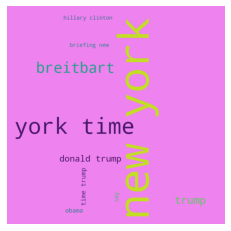

In [21]:
from wordcloud import WordCloud
wc=WordCloud(width=800,height=800,background_color="violet",min_font_size=20)
wc.generate(" ".join(messages[messages["label"]==0]["title"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

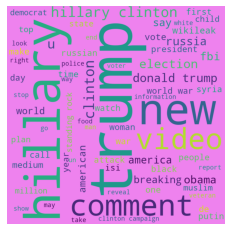

In [22]:
from wordcloud import WordCloud
wc=WordCloud(width=800,height=800,background_color="violet",min_font_size=20)
wc.generate(" ".join(messages[messages["label"]==1]["title"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

# Model Building and Model selection part

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Random Forest

In [24]:
pipe = Pipeline(
    [
        ("CountVectorizer",CountVectorizer()),
        ("RandomForestClassifier",RandomForestClassifier())
    ]
)

In [25]:
#train test split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1,stratify=y)

In [26]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                ('RandomForestClassifier', RandomForestClassifier())])

In [27]:
ypred=pipe.predict(xtest)

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
print("classification_report :\n",classification_report(ytest,ypred))
print("confusion_matrix :\n",confusion_matrix(ypred,ytest))
print("accuracy_score :\n",accuracy_score(ytest,ypred))

classification_report :
               precision    recall  f1-score   support

           0       0.98      0.90      0.94      3109
           1       0.89      0.98      0.93      2377

    accuracy                           0.94      5486
   macro avg       0.94      0.94      0.94      5486
weighted avg       0.94      0.94      0.94      5486

confusion_matrix :
 [[2809   44]
 [ 300 2333]]
accuracy_score :
 0.937294932555596


# Support Vector Machine

In [29]:
pipe = Pipeline(
    [
        ("CountVectorizer",CountVectorizer()),
        ("SVC",SVC())
    ]
)
pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
from sklearn.metrics import confusion_matrix,classification_report
print("classification_report :\n",classification_report(ytest,ypred))
print("confusion_matrix :\n",confusion_matrix(ypred,ytest))
print("accuracy_score :\n",accuracy_score(ytest,ypred))

classification_report :
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      3109
           1       0.86      0.99      0.92      2377

    accuracy                           0.93      5486
   macro avg       0.93      0.94      0.93      5486
weighted avg       0.94      0.93      0.93      5486

confusion_matrix :
 [[2736   20]
 [ 373 2357]]
accuracy_score :
 0.9283631060882246


# Naive Bayes

In [30]:
#BernoulliNB
pipe = Pipeline(
    [
        ("CountVectorizer",CountVectorizer()),
        ("NAive Bayes",BernoulliNB())
    ]
)
pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
from sklearn.metrics import confusion_matrix,classification_report
print("classification_report :\n",classification_report(ytest,ypred))
print("confusion_matrix :\n",confusion_matrix(ypred,ytest))
print("accuracy_score :\n",accuracy_score(ytest,ypred))

classification_report :
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      3109
           1       0.89      0.93      0.91      2377

    accuracy                           0.92      5486
   macro avg       0.92      0.92      0.92      5486
weighted avg       0.92      0.92      0.92      5486

confusion_matrix :
 [[2847  157]
 [ 262 2220]]
accuracy_score :
 0.9236237695953335


In [31]:
#MultinomialNB
pipe = Pipeline(
    [
        ("CountVectorizer",CountVectorizer()),
        ("NAive Bayes",MultinomialNB())
    ]
)
pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
from sklearn.metrics import confusion_matrix,classification_report
print("classification_report :\n",classification_report(ytest,ypred))
print("confusion_matrix :\n",confusion_matrix(ypred,ytest))
print("accuracy_score :\n",accuracy_score(ytest,ypred))

classification_report :
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      3109
           1       0.93      0.82      0.87      2377

    accuracy                           0.90      5486
   macro avg       0.90      0.89      0.89      5486
weighted avg       0.90      0.90      0.89      5486

confusion_matrix :
 [[2959  425]
 [ 150 1952]]
accuracy_score :
 0.8951877506379876


# Logistic Regression

In [32]:
pipe = Pipeline(
    [
        ("CountVectorizer",CountVectorizer()),
        ("Logistic_Regression",LogisticRegression())
    ]
)
pipe.fit(xtrain,ytrain)
ypred = pipe.predict(xtest)
print("classification_report :\n",classification_report(ytest,ypred))
print("confusion_matrix :\n",confusion_matrix(ypred,ytest))
print("accuracy_score :\n",accuracy_score(ytest,ypred))

classification_report :
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      3109
           1       0.89      0.97      0.93      2377

    accuracy                           0.93      5486
   macro avg       0.93      0.94      0.93      5486
weighted avg       0.94      0.93      0.93      5486

confusion_matrix :
 [[2816   68]
 [ 293 2309]]
accuracy_score :
 0.9341961356179366


In [33]:
cv = CountVectorizer(ngram_range=[1,1])
x = cv.fit_transform(x).toarray()

In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,stratify=y)

# ANN


In [35]:
ann = Sequential()

ann.add(Dense(units = 15,activation = "relu"))
ann.add(Dense(units = 30,activation = "relu"))
ann.add(Dense(units = 1,activation = "sigmoid"))

ann.compile(loss = "binary_crossentropy",optimizer = "adam",metrics="accuracy")
ann.fit(xtrain,ytrain,epochs = 40,batch_size = 50)

Epoch 1/40
275/275 [==============================] - 9s 19ms/step - loss: 0.3369 - accuracy: 0.8630
Epoch 2/40
275/275 [==============================] - 4s 16ms/step - loss: 0.1032 - accuracy: 0.9652
Epoch 3/40
275/275 [==============================] - 4s 13ms/step - loss: 0.0466 - accuracy: 0.9864
Epoch 4/40
275/275 [==============================] - 4s 13ms/step - loss: 0.0209 - accuracy: 0.9953
Epoch 5/40
275/275 [==============================] - 4s 14ms/step - loss: 0.0092 - accuracy: 0.9987
Epoch 6/40
275/275 [==============================] - 4s 13ms/step - loss: 0.0043 - accuracy: 0.9997
Epoch 7/40
275/275 [==============================] - 4s 13ms/step - loss: 0.0025 - accuracy: 0.9998
Epoch 8/40
275/275 [==============================] - 4s 13ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 9/40
275/275 [==============================] - 4s 14ms/step - loss: 0.0011 - accuracy: 0.9999
Epoch 10/40
275/275 [==============================] - 4s 13ms/step - loss: 6.5883e-04 - ac

In [36]:
pred = ann.predict(xtest)

143/143 [==============================] - 2s 7ms/step


In [37]:
pred

array([[9.9998146e-01],
       [1.3965630e-06],
       [1.3264469e-10],
       ...,
       [5.4140411e-02],
       [1.2821498e-09],
       [1.0000000e+00]], dtype=float32)

In [38]:
ypred = pred>0.5
ypred
print("classification_report :\n",classification_report(ytest,ypred))
print("confusion_matrix :\n",confusion_matrix(ypred,ytest))
print("accuracy_score :\n",accuracy_score(ytest,ypred))

classification_report :
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      2591
           1       0.90      0.91      0.91      1981

    accuracy                           0.92      4572
   macro avg       0.91      0.92      0.92      4572
weighted avg       0.92      0.92      0.92      4572

confusion_matrix :
 [[2382  170]
 [ 209 1811]]
accuracy_score :
 0.9171041119860017


In [39]:
sentlen = []
for i in df["title"]:
    sentlen.append(len(word_tokenize(i)))
df["SentLen"] = sentlen
df.head()

,id,title,author,text,label,SentLen
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,19
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,11
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,10
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,14


In [40]:
max(sentlen)

79

In [41]:
np.quantile(sentlen, 0.95)

22.0

In [42]:
max_len = np.quantile(sentlen, 0.95)

In [43]:
x = messages["title"]
y = messages["label"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,stratify = y,test_size = 0.25)
tok = Tokenizer(char_level=False, split=" ")
tok.fit_on_texts(xtrain)
tok.index_word

{1: 'new',
 2: 'time',
 3: 'york',
 4: 'trump',
 5: 'breitbart',
 6: 'clinton',
 7: 'hillary',
 8: 'donald',
 9: 'election',
 10: 'say',
 11: 'obama',
 12: 'video',
 13: 'war',
 14: 'state',
 15: 'u',
 16: 'russia',
 17: 'president',
 18: 'world',
 19: 'comment',
 20: 'news',
 21: 'email',
 22: 'day',
 23: 'fbi',
 24: 'report',
 25: 'attack',
 26: 'america',
 27: 'american',
 28: 'house',
 29: 'white',
 30: 'medium',
 31: 'police',
 32: 'woman',
 33: 'campaign',
 34: 'vote',
 35: 'year',
 36: 'first',
 37: 'call',
 38: 'bill',
 39: 'briefing',
 40: 'get',
 41: 'plan',
 42: 'one',
 43: 'syria',
 44: 'show',
 45: 'people',
 46: 'watch',
 47: 'black',
 48: 'russian',
 49: 'make',
 50: 'muslim',
 51: 'democrat',
 52: 'may',
 53: 'win',
 54: 'right',
 55: 'go',
 56: 'man',
 57: 'life',
 58: 'could',
 59: 'voter',
 60: 'million',
 61: 'child',
 62: 'wikileaks',
 63: 'republican',
 64: 'take',
 65: 'border',
 66: 'china',
 67: 'back',
 68: 'like',
 69: 'court',
 70: 'putin',
 71: 'comey',
 72

In [44]:
tok.index_word[1652]

'colorado'

In [45]:
_vocab_len = len(tok.index_word)
_vocab_len

15195

In [46]:
len(x)

18285

In [47]:
seqtrain = tok.texts_to_sequences(xtrain) 
seqtrain[0]


[47, 27, 2728, 3660, 1, 3, 2]

In [48]:
seqmattrain = sequence.pad_sequences(seqtrain, maxlen= int(max_len)) #step2
seqmattrain[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,   47,   27, 2728, 3660,    1,    3,    2])

In [49]:
seqtest = tok.texts_to_sequences(xtest)
seqmattest = sequence.pad_sequences(seqtest, maxlen=int(max_len))
seqmattest

array([[   0,    0,    0, ..., 1205, 2707, 3211],
       [   0,    0,    0, ...,  226, 1497,    5],
       [   0,    0,    0, ...,  547,   85,  239],
       ...,
       [   0,    0,    0, ...,  953, 1895, 1821],
       [   0,    0,    0, ...,    1,    3,    2],
       [   0,    0,    0, ...,    1,    3,    2]])

In [50]:
max_len

22.0

# RNN

In [51]:
#Simple RNN

rnn = Sequential()

rnn.add(Embedding(_vocab_len+1,700, input_length=int(max_len), mask_zero=True))
rnn.add(SimpleRNN(units=32, activation="tanh"))
rnn.add(Dense(units=32, activation="relu"))
rnn.add(Dropout(0.2))

rnn.add(Dense(units=1, activation="sigmoid"))

rnn.compile(optimizer="adam", loss="binary_crossentropy")

rnn.fit(seqmattrain, ytrain, batch_size=50, epochs=50)

ypred = rnn.predict(seqmattest)

ypred = ypred>0.5

Epoch 1/50
275/275 [==============================] - 61s 201ms/step - loss: 0.2334
Epoch 2/50
275/275 [==============================] - 55s 199ms/step - loss: 0.0478
Epoch 3/50
275/275 [==============================] - 55s 200ms/step - loss: 0.0109
Epoch 4/50
275/275 [==============================] - 56s 202ms/step - loss: 0.0026
Epoch 5/50
275/275 [==============================] - 52s 189ms/step - loss: 6.6030e-04
Epoch 6/50
275/275 [==============================] - 52s 191ms/step - loss: 4.3065e-04
Epoch 7/50
275/275 [==============================] - 53s 192ms/step - loss: 3.0914e-04
Epoch 8/50
275/275 [==============================] - 50s 183ms/step - loss: 2.6221e-04
Epoch 9/50
275/275 [==============================] - 52s 191ms/step - loss: 2.2445e-04
Epoch 10/50
275/275 [==============================] - 53s 194ms/step - loss: 1.9819e-04
Epoch 11/50
275/275 [==============================] - 53s 193ms/step - loss: 1.7884e-04
Epoch 12/50
275/275 [=========================

In [52]:
from sklearn.metrics import classification_report
print("classification_report :\n",classification_report(ytest,ypred))
print("confusion_matrix :\n",confusion_matrix(ypred,ytest))
print("accuracy_score :\n",accuracy_score(ytest,ypred))

classification_report :
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      2591
           1       0.92      0.92      0.92      1981

    accuracy                           0.93      4572
   macro avg       0.93      0.93      0.93      4572
weighted avg       0.93      0.93      0.93      4572

confusion_matrix :
 [[2428  162]
 [ 163 1819]]
accuracy_score :
 0.928915135608049


In [53]:
#RNN WITH LSTM

rnn = Sequential()

rnn.add(Embedding(_vocab_len+1,700, input_length=int(max_len), mask_zero=True))

rnn.add(LSTM(units=32, activation="tanh"))
rnn.add(Dense(units=32, activation="relu"))
rnn.add(Dropout(0.2))

rnn.add(Dense(units=1, activation="sigmoid"))

rnn.compile(optimizer="adam", loss="binary_crossentropy")

rnn.fit(seqmattrain, ytrain, batch_size=50, epochs=50)

ypred = rnn.predict(seqmattest)

ypred = ypred>0.5

Epoch 1/50
275/275 [==============================] - 51s 170ms/step - loss: 0.2509
Epoch 2/50
275/275 [==============================] - 45s 164ms/step - loss: 0.0852
Epoch 3/50
275/275 [==============================] - 45s 165ms/step - loss: 0.0337
Epoch 4/50
275/275 [==============================] - 47s 169ms/step - loss: 0.0140
Epoch 5/50
275/275 [==============================] - 46s 168ms/step - loss: 0.0076
Epoch 6/50
275/275 [==============================] - 46s 168ms/step - loss: 0.0055
Epoch 7/50
275/275 [==============================] - 48s 175ms/step - loss: 0.0046
Epoch 8/50
275/275 [==============================] - 47s 171ms/step - loss: 0.0029
Epoch 9/50
275/275 [==============================] - 49s 177ms/step - loss: 9.6739e-04
Epoch 10/50
275/275 [==============================] - 46s 169ms/step - loss: 0.0019
Epoch 11/50
275/275 [==============================] - 50s 184ms/step - loss: 7.2934e-04
Epoch 12/50
275/275 [==============================] - 51s 185ms/s

In [54]:
from sklearn.metrics import classification_report
print("classification_report :\n",classification_report(ytest,ypred))
print("confusion_matrix :\n",confusion_matrix(ypred,ytest))
print("accuracy_score :\n",accuracy_score(ytest,ypred))

classification_report :
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      2591
           1       0.92      0.89      0.91      1981

    accuracy                           0.92      4572
   macro avg       0.92      0.92      0.92      4572
weighted avg       0.92      0.92      0.92      4572

confusion_matrix :
 [[2445  213]
 [ 146 1768]]
accuracy_score :
 0.9214785651793526


In [55]:
#Gated Neural Unit(GRU)

rnn = Sequential()

rnn.add(Embedding(_vocab_len+1,700, input_length=int(max_len), mask_zero=True))

rnn.add(GRU(units=32, activation="tanh"))
rnn.add(Dense(units=32, activation="relu"))
rnn.add(Dropout(0.2))

rnn.add(Dense(units=1, activation="sigmoid"))

rnn.compile(optimizer="adam", loss="binary_crossentropy")

rnn.fit(seqmattrain, ytrain, batch_size=50, epochs=50)

ypred = rnn.predict(seqmattest)

ypred = ypred>0.5

Epoch 1/50
275/275 [==============================] - 45s 149ms/step - loss: 0.2515
Epoch 2/50
275/275 [==============================] - 41s 148ms/step - loss: 0.0816
Epoch 3/50
275/275 [==============================] - 41s 149ms/step - loss: 0.0224
Epoch 4/50
275/275 [==============================] - 41s 147ms/step - loss: 0.0096
Epoch 5/50
275/275 [==============================] - 41s 149ms/step - loss: 0.0036
Epoch 6/50
275/275 [==============================] - 43s 155ms/step - loss: 0.0015
Epoch 7/50
275/275 [==============================] - 42s 151ms/step - loss: 0.0017
Epoch 8/50
275/275 [==============================] - 41s 148ms/step - loss: 8.9327e-04
Epoch 9/50
275/275 [==============================] - 41s 151ms/step - loss: 5.4311e-04
Epoch 10/50
275/275 [==============================] - 40s 146ms/step - loss: 5.5079e-04
Epoch 11/50
275/275 [==============================] - 41s 150ms/step - loss: 3.6576e-04
Epoch 12/50
275/275 [==============================] - 41s

In [56]:
from sklearn.metrics import classification_report
print("classification_report :\n",classification_report(ytest,ypred))
print("confusion_matrix :\n",confusion_matrix(ypred,ytest))
print("accuracy_score :\n",accuracy_score(ytest,ypred))

classification_report :
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      2591
           1       0.92      0.90      0.91      1981

    accuracy                           0.92      4572
   macro avg       0.92      0.92      0.92      4572
weighted avg       0.92      0.92      0.92      4572

confusion_matrix :
 [[2443  205]
 [ 148 1776]]
accuracy_score :
 0.9227909011373578


In [57]:
conclusions_ML = pd.DataFrame({
    "Model":["Random_Forest","Naive_Bayes(BernoulliNB)","Naive_Bayes(MultinomialNB)","Support_Vector_Machine","Logistic_Regression"],
    "Accuracy":[93.6,92.8,92.3,89.5,93.4]
})

In [58]:
conclusions_DL = pd.DataFrame({
    "Model":["Artificial_Neural_Network","Simple_RNN","LSTM","GRU"],
    "Accuracy":[92.1,92.2,91.6,91.8]
})

# Accuracy Using ML

In [59]:
conclusions_ML

,Model,Accuracy
0,Random_Forest,93.6
1,Naive_Bayes(BernoulliNB),92.8
2,Naive_Bayes(MultinomialNB),92.3
3,Support_Vector_Machine,89.5
4,Logistic_Regression,93.4


# Accuracy using DL

In [60]:
conclusions_DL

,Model,Accuracy
0,Artificial_Neural_Network,92.1
1,Simple_RNN,92.2
2,LSTM,91.6
3,GRU,91.8
